### Tabu search

Z uporabo metahevrističnega algoritma preverjamo našo hipotezo o grafih z največjo sigma nepravilnostjo.

Opis algoritma:

- Glej pdf iz spletne - stran 7
- Soseščina bo predstavljena kot grafi, kjer vozlišču odvzamemo povezavo in do dve povezavi dodamo. 
- Tabu list shranjuje vozlisca, ki smo jih spreminjali
- tu je zaustavitveni pogoj v primeru, ko je prva rešitev najboljša, kar število iteracij

In [15]:
# importing necessary libraries
import random
import math
from itertools import combinations

# function for generating random neighbour of graph G
def random_neighbour(G):
    # get node
    N = G.vertices()[randrange(G.order())]
    # remove one edge of node N
    if len(G.neighbors(N)) != 0:
        G.delete_edge(N, G.neighbors(N)[randrange(len(list(G.neighbors(N))))])
    
    # add up to two edges
    k = 0 # max number of iterations
    # i is 0, 1 or 2, depending on probability (0: .4, 1: .45, 2: .15)
    i = 0
    if random.random() > .4:
        i += 1
        if random.random() > .75:
            i += 1
    j = 0 # counter for number of added edges
    while k < 8 and j < i:
        k += 1
        # new node
        V = G.vertices()[randrange(G.order())]
        if V == N or V in G.neighbors(N): # if node is N or is already connected to N, we skip it
            continue
        G.add_edge(N, V)
        
        # is triangle free
        if G.triangles_count() != 0:
            G.delete_edge(N, V) # if its not triangle free, we remove the edge that we added
        else: 
            j += 1
            continue

    return G # we return random neighbour

In [16]:
# sigma total irr, our f(s)
def sigma_irr(G):
    return sum((u - v) ** 2 for u, v in combinations(G.degree(), 2))

In [17]:
# tabu search - main function (our initial solution, number of tweaks, length of tabu list, max_iterations_without_improvement)
def tabu_search(initial_G, m, l, max_iterations_without_improvement):
    G = initial_G.copy() # set G 
    best = G.copy() # set current best
    tabu_list = [] # initialize tabu list
    num_of_it_without_improvement = 0 # counter for iterations without improvement

    while num_of_it_without_improvement < max_iterations_without_improvement:
        # update tabu list
        if len(tabu_list) > l:
            tabu_list.pop(0)
        
        # new solution m times
        G_mod = random_neighbour(G) # first solution
        replace = False # check if its allowed (if it was recently used)
        if any(G_mod_mod.is_isomorphic(g) for g in tabu_list):
            replace = True

        for i in range(m-1):
            G_mod_mod = random_neighbour(G) # additional options

            # check, whether option is allowed and if its better or previous one isn't allowed
            if not(any(G_mod_mod.is_isomorphic(g) for g in tabu_list)) and (sigma_irr(G_mod) < sigma_irr(G_mod_mod) or replace == True):
                G_mod = G_mod_mod.copy()
                replace = False
        
        # update G 
        G = G_mod.copy()

        # add to tabu list
        tabu_list.append(G)

        #check if its better than current best
        if sigma_irr(G) > sigma_irr(best):
            best = G.copy()
        else: # count this iteration as "failed"
            num_of_it_without_improvement += 1

    return best, G # return best solution and last option

### Pridobivanje prve rešitve

In [18]:
# generate star graph with max sigma total irr. (in center there can be multiple vertices)
def generate_max_sigma_star_graph(n):
    
    # generate star graph with or order n and c central vertices
    def generate_star_graph(n, c):
        graph = {} # dict. of neighbours
        i = 0
        for k in range(n): 
            i += 1
            if i <= c: # if vertex is central, set outer vertices as neighbors
                graph[k] = list(range(c, n))
            else: # else vertex is outer, set central vertices as neighbors
                graph[k] = list(range(c))
        
        return Graph(graph)


    max_sigma = 0 # for keeping maximum sigma value
    max_sigma_graphs = [] # list of graphs with maximum sigma value

    # check all graphs, where number of central nodes varies
    for c in range(1, round(n/2)):
        G = generate_star_graph(n, c) # get star graph
        sigma = sigma_irr(G) # get sigma value of star graph

        if sigma > max_sigma: # update if its the best
            max_sigma_graphs = [G]
            max_sigma = sigma
        elif sigma == max_sigma: # if equal, just append
            max_sigma_graphs.append(G)
    
    return max_sigma_graphs # return all graphs with max sigma value

### Poganjanje algoritmov - zaenkrat samo testiranje

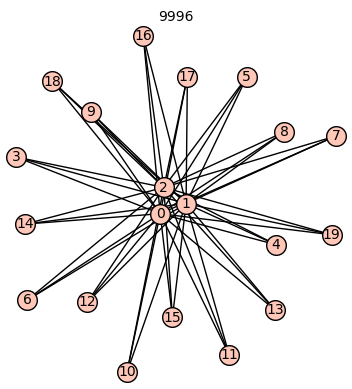

9996 7324
9996 6736
9996 6884
9996 7284
9996 7024


In [23]:
n = 20

l = round(n)
#m = round(n/2)
m = 5
initial_G = generate_max_sigma_star_graph(n)
initial_G[0].show(title=f"{sigma_irr(initial_G[0])}")
max_iterations_without_improvement = 2 # v končnem izdelku bomo imeli graf razlike


for i in range(5):
    Best, G = tabu_search(initial_G[0], m, l, max_iterations_without_improvement)
    #G.show(title=f"{sigma_irr(G)}")
    print(sigma_irr(Best), sigma_irr(G))